In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, precision_score, recall_score
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("dataset.csv")
# Проверим данные
df.info() # Пропусков нет
df.describe() # Выбросов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [213]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [214]:
# Разбиение на возрастные категории по риску
def age(_age):
  return _age/100
df['AGE'] = df['AGE'].apply(age)

In [215]:
# Кодируем категориальные данные
df['GENDER'] = df['GENDER'].map({'M':1, 'F':0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':0, 'YES':1})
df['LUNG_CANCER'].describe()

count    3000.000000
mean        0.506000
std         0.500047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: LUNG_CANCER, dtype: float64

In [216]:
df[df.columns.drop(["GENDER", "AGE", "LUNG_CANCER"])] -= 1
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,0.65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,0.55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,0.78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,0.60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,0.80,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0.71,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2996,0,0.75,0,1,0,0,0,1,1,1,1,0,0,1,0,0
2997,0,0.62,1,1,1,0,1,1,1,1,0,0,1,1,1,1
2998,1,0.30,0,0,1,1,1,1,1,1,1,0,1,0,1,1


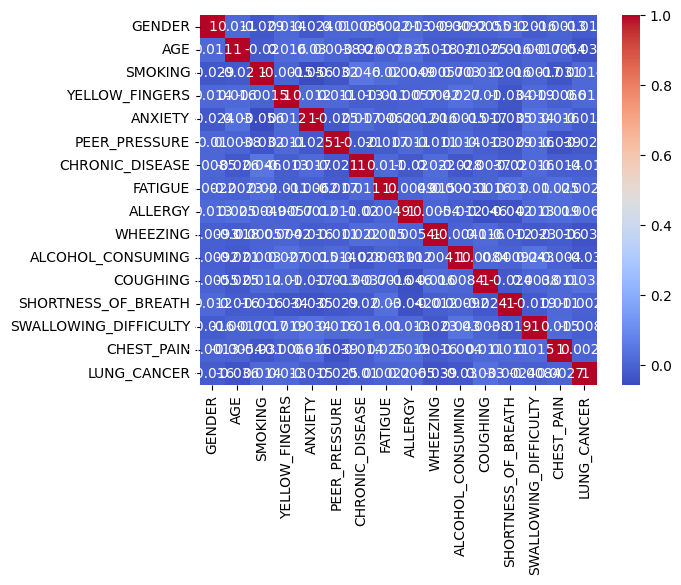

In [217]:
# Проверяем на отсутствие зависимых данных
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show() # Корреляций нет

In [218]:
import keras
import tensorflow as tf


In [493]:
inputs = keras.Input((15,))
# x = inputs
x = keras.layers.Dense(3, activation='relu')(inputs)
# x = keras.layers.Dense(2, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [494]:
model.summary()

Model: "functional_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_66 (InputLayer)          │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 3)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

In [495]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["precision", "recall", keras.metrics.F1Score(threshold=0.5)]
)

In [496]:
history = model.fit(
    x=df.drop(columns=['LUNG_CANCER']),
    y=df[['LUNG_CANCER']],
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.4543 - loss: 0.7145 - precision: 0.5065 - recall: 0.4119 - val_f1_score: 0.4641 - val_loss: 0.7008 - val_precision: 0.4455 - val_recall: 0.4843
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.5538 - loss: 0.7000 - precision: 0.5054 - recall: 0.6125 - val_f1_score: 0.5517 - val_loss: 0.6977 - val_precision: 0.4694 - val_recall: 0.6690
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6046 - loss: 0.6969 - precision: 0.5080 - recall: 0.7465 - val_f1_score: 0.5757 - val_loss: 0.6972 - val_precision: 0.4702 - val_recall: 0.7422
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6192 - loss: 0.6950 - precision: 0.5131 - recall: 0.7807 - val_f1_score: 0.6047 - val_loss: 0.6968 - val_precision: 0.4805 - val_recall: 0.8153
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6342 - loss: 0.6940 - precision: 0.5150 - recall: 0.8253 - val_f1_score: 0.6099 - val_loss: 0.6965 

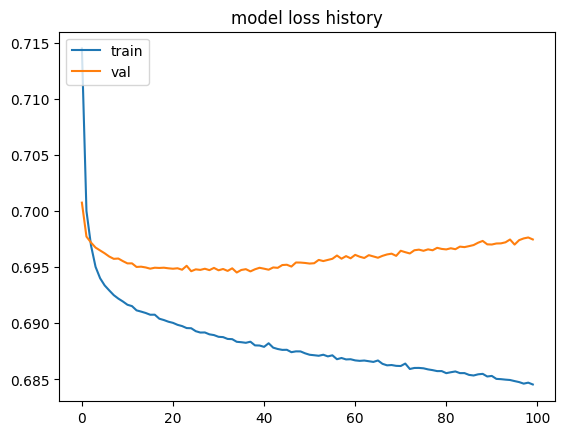

In [497]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss history')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

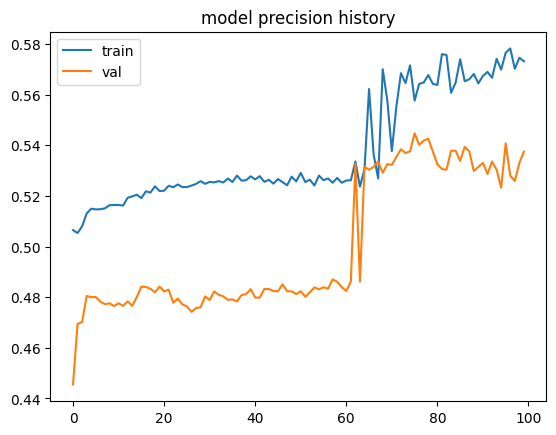

In [498]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision history')
plt.legend(["train", "val"], loc='upper left')
plt.show()

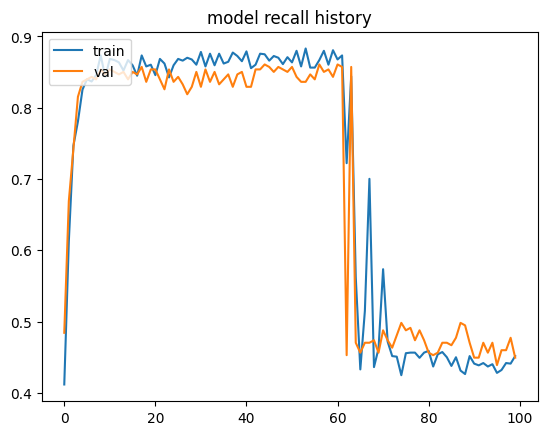

In [499]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall history')
plt.legend(["train", "val"], loc='upper left')
plt.show()

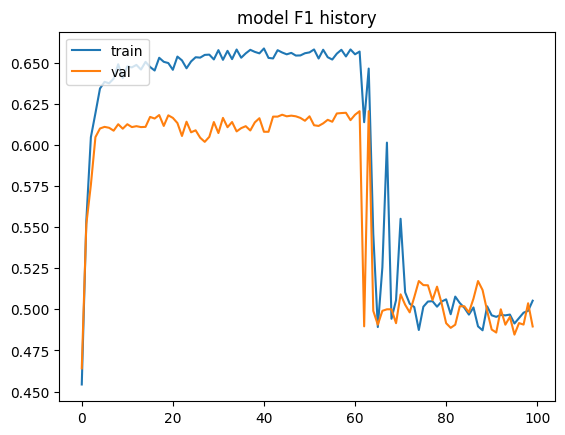

In [500]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model F1 history')
plt.legend(["train", "val"], loc='upper left')
plt.show()